In [1]:
import sys
sys.path.append('../') 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary functions
from src.loader import load_data
from src.utils import calculate_total_usage,calculate_average_usage,aggregate_user_data

# Load data
# Define the correct SQL query
sql_query =  """
SELECT "MSISDN/Number","Bearer Id", "Dur. (ms)", "Total DL (Bytes)", "Total UL (Bytes)",
       "Social Media DL (Bytes)", "Social Media UL (Bytes)",
       "Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)",
       "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)",
       "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)"
FROM xdr_data;
"""
df = load_data(sql_query)


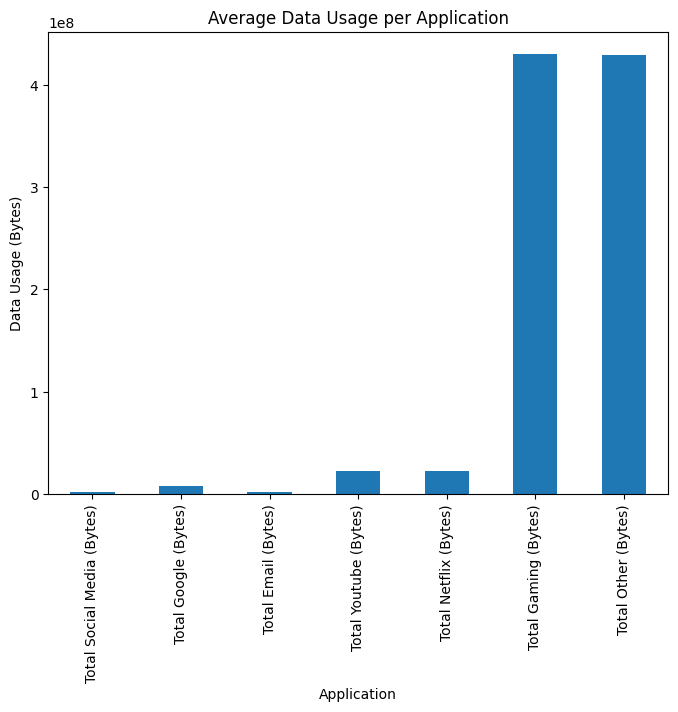

In [4]:
# Visualization in main.py or a notebook
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total usage
total_usage_df = calculate_total_usage(df)

# Calculate average usage
average_usage = calculate_average_usage(total_usage_df)

# Plotting the average usage data
plt.figure(figsize=(8, 6))
average_usage.plot(kind='bar')
plt.title('Average Data Usage per Application')
plt.xlabel('Application')
plt.ylabel('Data Usage (Bytes)')
plt.show()


In [2]:
aggregated_user_df = aggregate_user_data(df)
print(aggregated_user_df.head())

               number_of_xdr_sessions  total_duration  total_download  \
MSISDN/Number                                                           
3.360100e+10                        1        116720.0    8.426375e+08   
3.360100e+10                        1        181230.0    1.207552e+08   
3.360100e+10                        1        134969.0    5.566597e+08   
3.360101e+10                        1         49878.0    4.019932e+08   
3.360101e+10                        2         37104.0    1.363130e+09   

               total_upload  total_social_media  total_google  total_email  \
MSISDN/Number                                                                
3.360100e+10     36053108.0           2232135.0     4389005.0    1331362.0   
3.360100e+10     36104459.0           2660565.0     5334863.0    3307781.0   
3.360100e+10     39306820.0           3195623.0     3443126.0    3205380.0   
3.360101e+10     20327526.0            280294.0     9678493.0    2284670.0   
3.360101e+10     942

In [4]:
print(aggregated_user_df.columns)


Index(['number_of_xdr_sessions', 'total_duration', 'total_download',
       'total_upload', 'total_social_media', 'total_google', 'total_email',
       'total_youtube', 'total_netflix', 'total_gaming', 'total_other'],
      dtype='object')


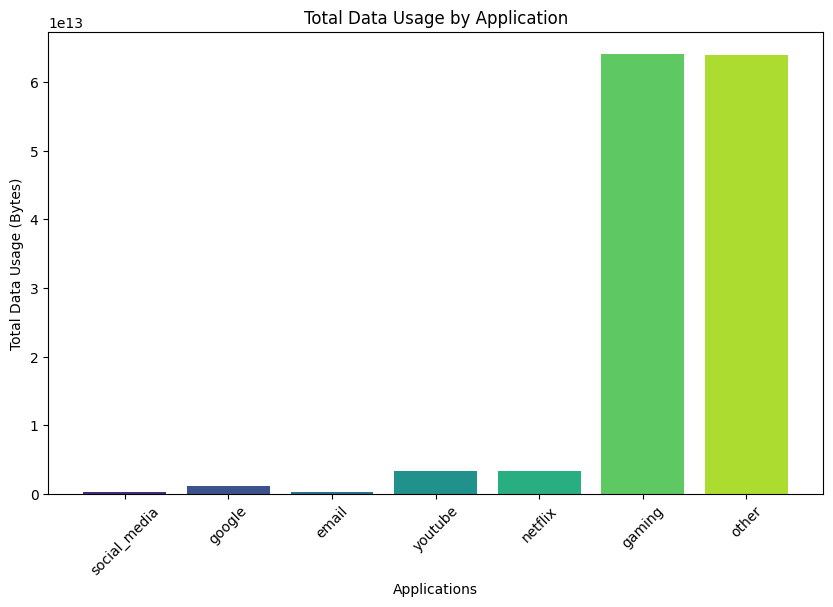

In [16]:
# Total Data Usage by Application
import matplotlib.pyplot as plt
import seaborn as sns

def plot_total_data_usage(aggregated_df):
    apps = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']
    columns = ['total_social_media', 'total_google', 'total_email', 'total_youtube', 'total_netflix', 'total_gaming', 'total_other']
    total_usage = aggregated_df[columns].sum()

    plt.figure(figsize=(10, 6))
    colors = sns.color_palette('viridis', n_colors=len(apps))    # Get a list of colors from the viridis palette
    for i, app in enumerate(apps):
        plt.bar(app, total_usage.iloc[i], color=colors[i])  
    plt.title('Total Data Usage by Application')
    plt.ylabel('Total Data Usage (Bytes)')
    plt.xlabel('Applications')
    plt.xticks(rotation=45)
    plt.show()


plot_total_data_usage(aggregated_user_df)


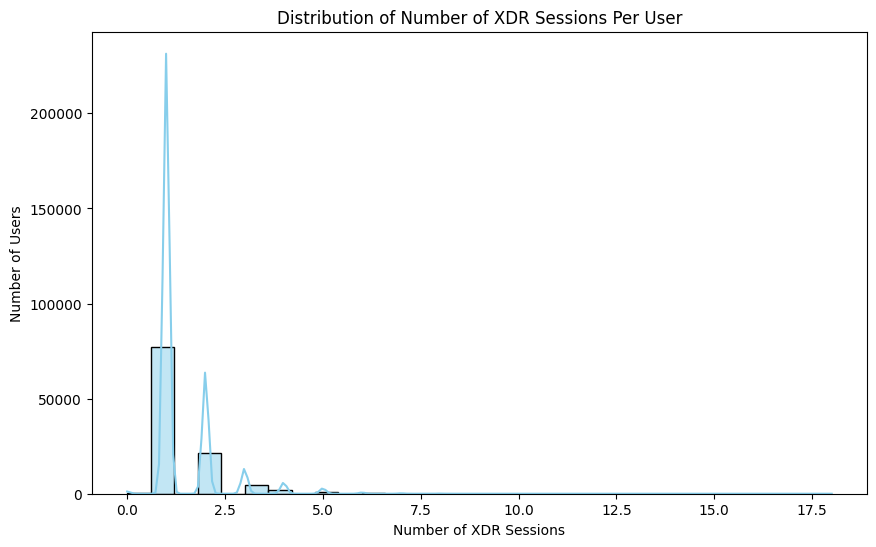

In [6]:
# Histogram of XDR Sessions
def plot_sessions_histogram(aggregated_df):
    plt.figure(figsize=(10, 6))
    sns.histplot(aggregated_df['number_of_xdr_sessions'], bins=30, color='skyblue', kde=True)
    plt.title('Distribution of Number of XDR Sessions Per User')
    plt.xlabel('Number of XDR Sessions')
    plt.ylabel('Number of Users')
    plt.show()

plot_sessions_histogram(aggregated_user_df)


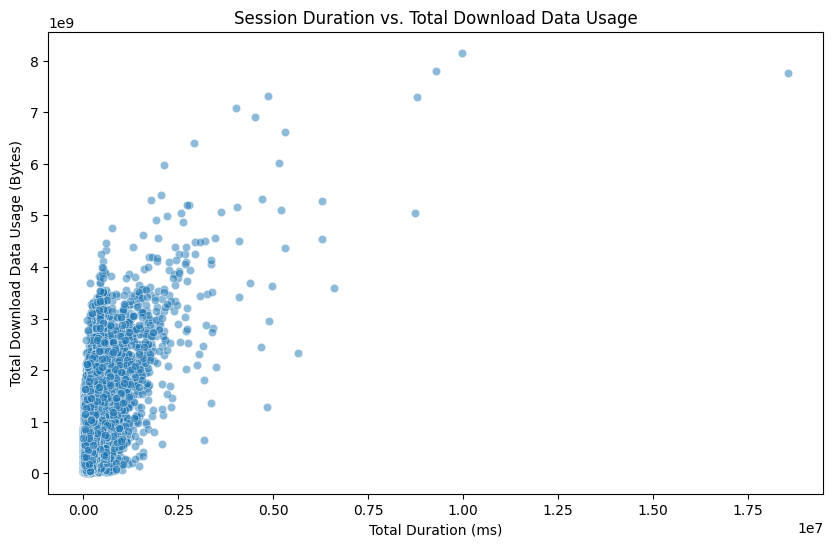

In [7]:
# Scatter Plot of Duration vs. Data Usage
def plot_duration_vs_data_usage(aggregated_df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_duration', y='total_download', data=aggregated_df, alpha=0.5)
    plt.title('Session Duration vs. Total Download Data Usage')
    plt.xlabel('Total Duration (ms)')
    plt.ylabel('Total Download Data Usage (Bytes)')
    plt.show()

plot_duration_vs_data_usage(aggregated_user_df)
